 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [525]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [526]:
# Reading whale returns
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\whale_returns.csv")
whale_returns = pd.read_csv(csvpath)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [527]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [528]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [529]:
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [530]:
whale_returns = whale_returns.set_index(pd.to_datetime(whale_returns["Date"]))
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [531]:
whale_returns = whale_returns.drop(columns=["Date"])
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [532]:
# Reading algorithmic returns
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\algo_returns.csv")
algo_returns = pd.read_csv(csvpath)
algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [533]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [534]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [535]:
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [536]:
algo_returns = algo_returns.set_index(pd.to_datetime(algo_returns["Date"]))
algo_returns.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [537]:
algo_returns = algo_returns.drop(columns=["Date"])
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [538]:
# Reading S&P TSX 60 Closing Prices
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\sp_tsx_history.csv")
sp_tsx = pd.read_csv(csvpath)
sp_tsx.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [539]:
sp_tsx = sp_tsx.set_index(pd.to_datetime(sp_tsx["Date"]))
sp_tsx.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,"$12,370.19"
2012-10-02,2-Oct-2012,"$12,391.23"
2012-10-03,3-Oct-2012,"$12,359.47"
2012-10-04,4-Oct-2012,"$12,447.68"
2012-10-05,5-Oct-2012,"$12,418.99"


In [540]:
sp_tsx = sp_tsx.drop(columns=["Date"])
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [541]:
sp_tsx["Close"] = sp_tsx["Close"].str.replace("$", "")
sp_tsx["Close"]

Date
2012-10-01    12,370.19
2012-10-02    12,391.23
2012-10-03    12,359.47
2012-10-04    12,447.68
2012-10-05    12,418.99
                ...    
2019-12-20    17,118.44
2019-12-23    17,128.71
2019-12-24    17,180.15
2019-12-27    17,168.21
2019-12-30    17,098.56
Name: Close, Length: 1818, dtype: object

In [542]:
sp_tsx["Close"] = sp_tsx["Close"].str.replace(",", "")
sp_tsx["Close"]

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [544]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [545]:
# Fix Data Types
sp_tsx["Close"] = sp_tsx["Close"].astype('float')

In [546]:
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [547]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [548]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [549]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns = {"Close":"TSX at Close"})
sp_tsx_daily_returns.head()

,TSX at Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [550]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_daily_returns], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

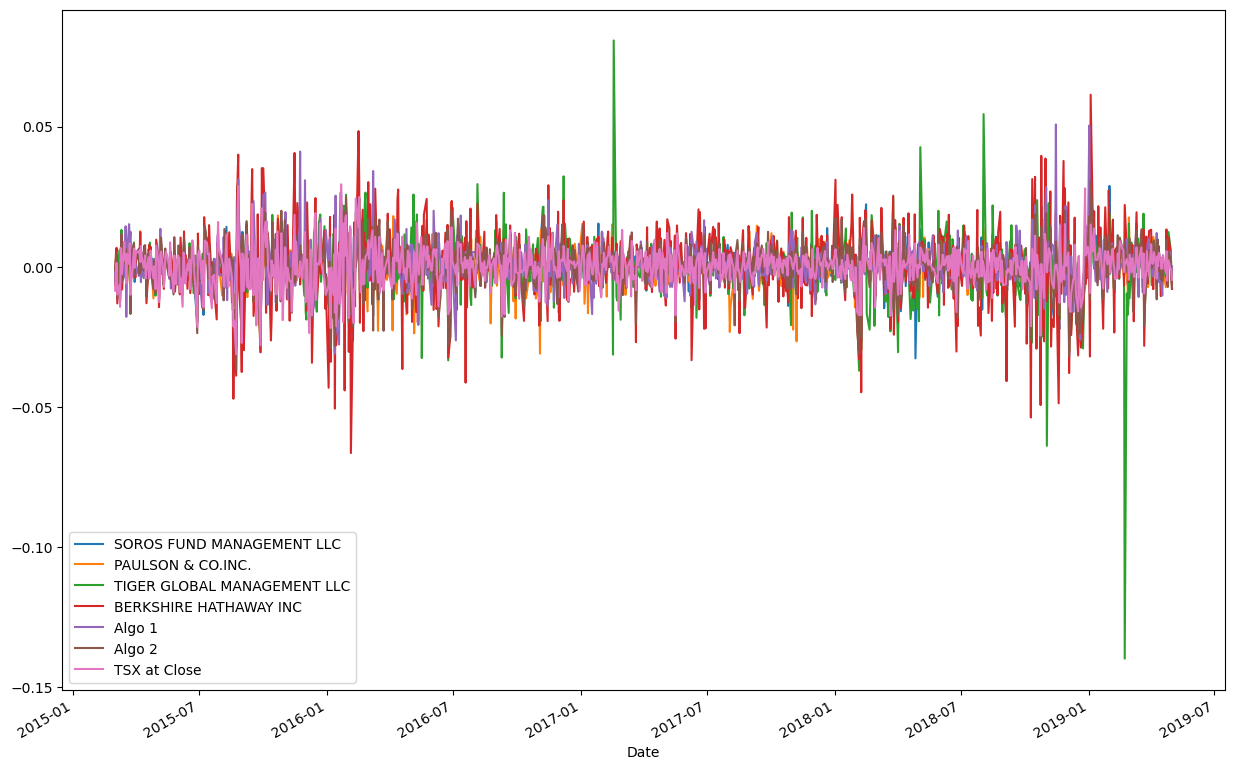

In [551]:
# Plot daily returns of all portfolios
joined_returns.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

In [552]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<Axes: xlabel='Date'>

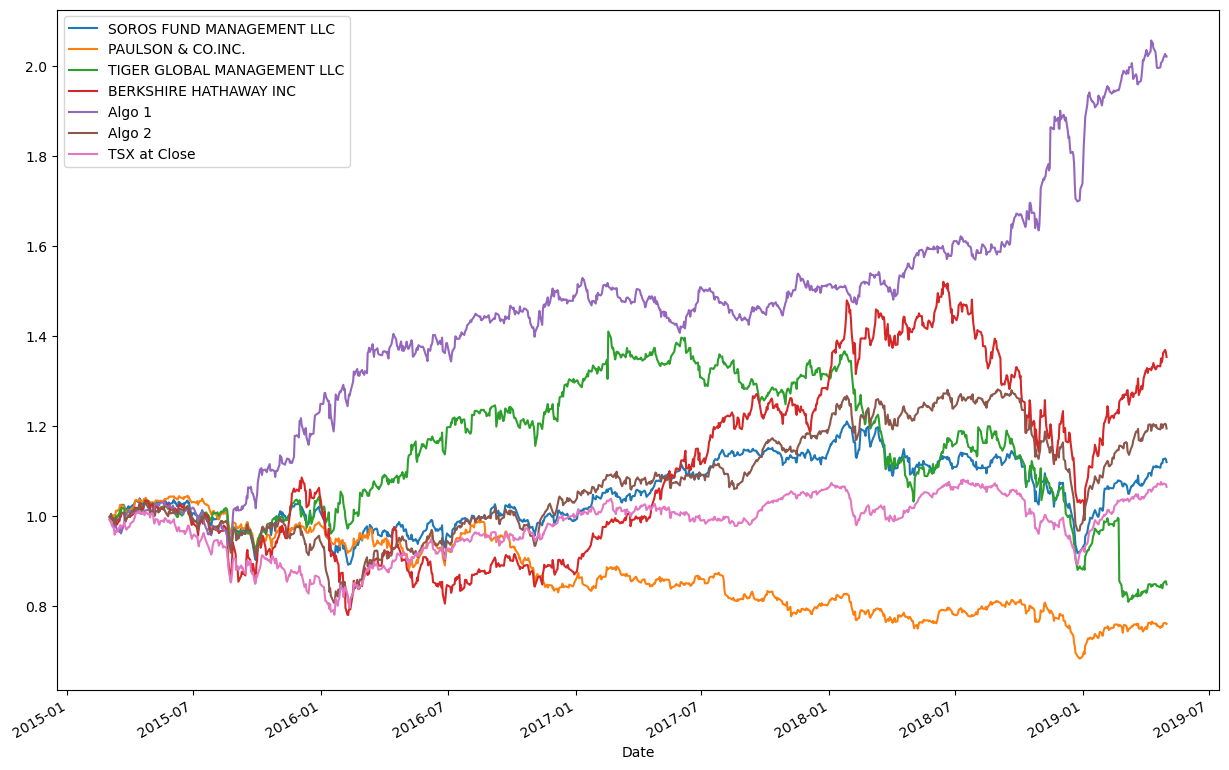

In [553]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

---

In [612]:
# Does any portfolio outperform the S&P TSX 60?
## On a cumulative basis, as of the last date of the reported data, there were two funds that underperformed the 
## S&P TSX, namely Paulson & Co and Tiger Global. Conversely, there were four funds that outperformed the S&P TSX, 
## namely, Soros Fund, Algo 2, Berkshire and Algo 1. Algo 1 has, historically, consistently outperformed the 
## S&P TSX.

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

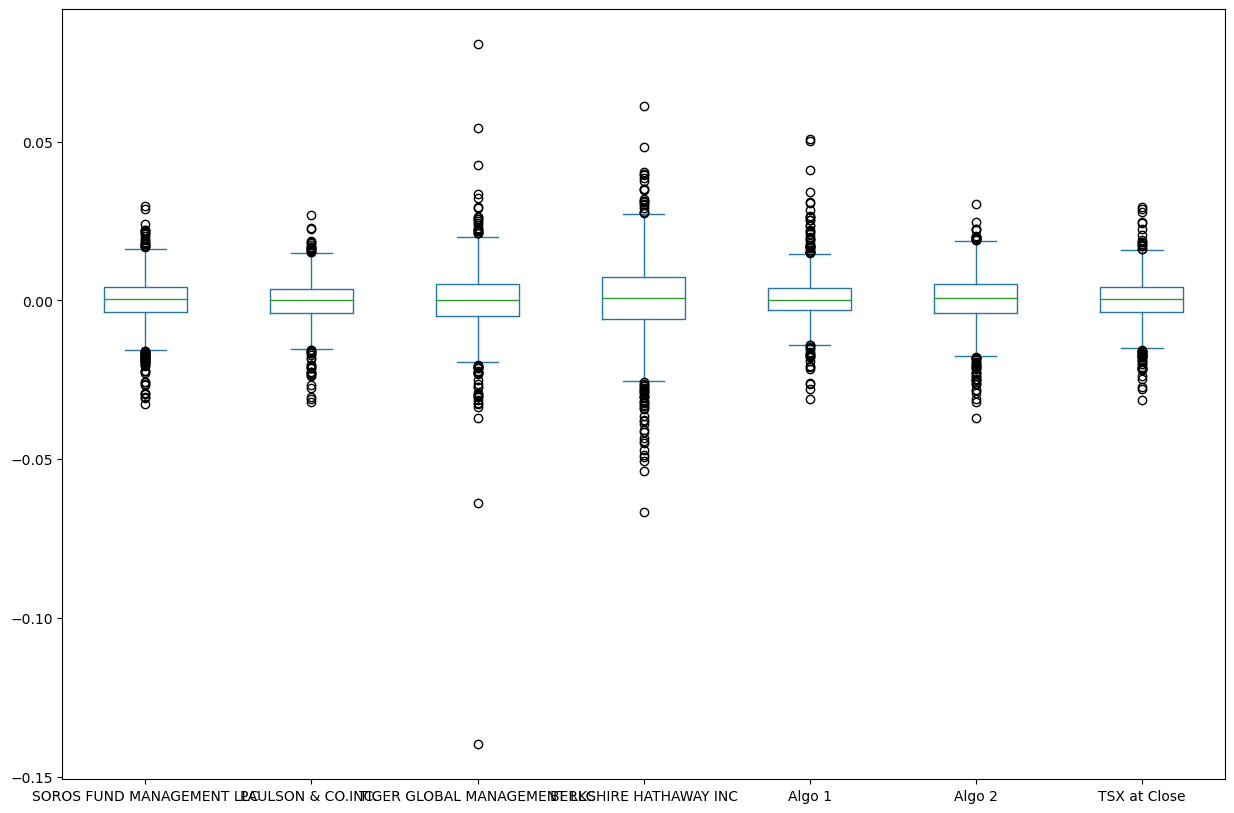

In [554]:
# Box plot to visually show risk
joined_returns.plot.box(figsize=(15,10))

### Calculate Standard Deviations

In [555]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX at Close                   0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [556]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp_tsx = joined_returns["TSX at Close"].std()
daily_std_sp_tsx

0.007034167748577725

In [387]:
# Determine which portfolios are riskier than the S&P TSX 60

In [557]:
daily_std = daily_std.sort_values(ascending=True)
daily_std

PAULSON & CO.INC.              0.006982
TSX at Close                   0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [558]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.110841
TSX at Close                   0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [390]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


In [559]:
rstd_21 = joined_returns.rolling(window=21).std().dropna()
rstd_21.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


<Axes: xlabel='Date'>

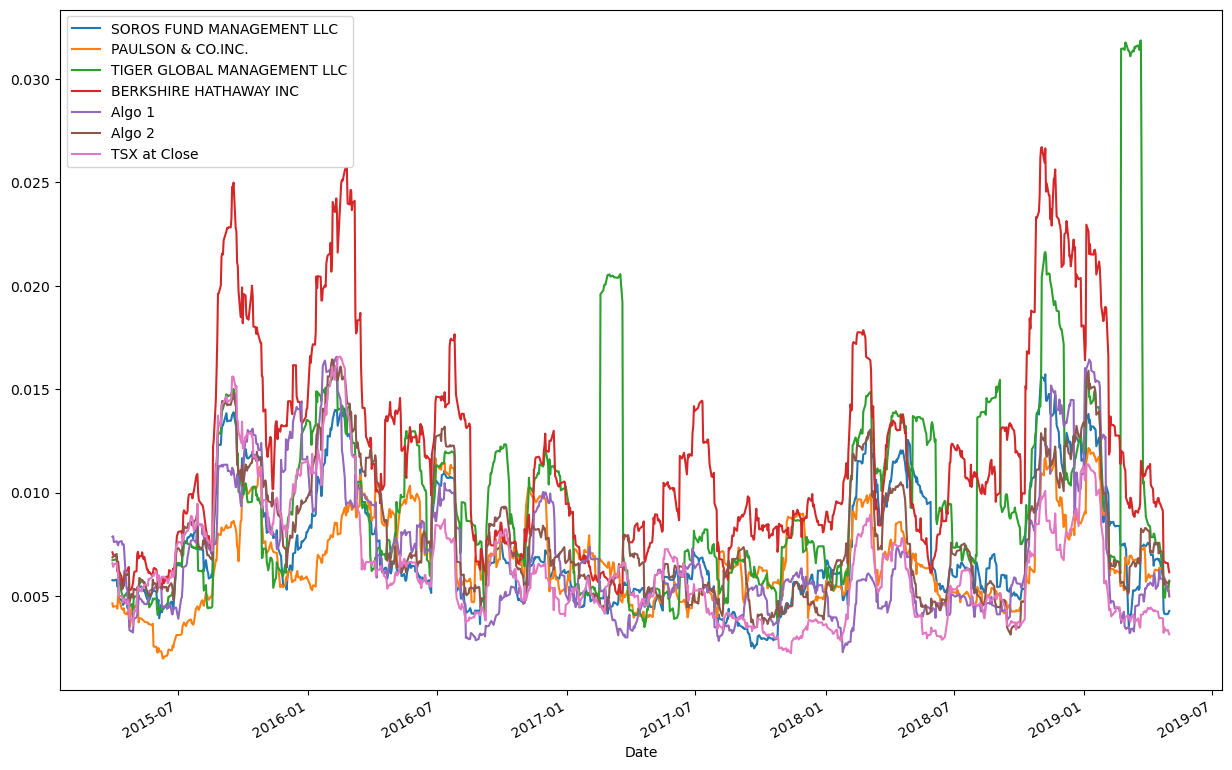

In [560]:
rstd_21.plot(figsize=(15,10))

### Calculate and plot the correlation

In [393]:
# Calculate the correlation

# Display de correlation matrix


In [561]:
correlation = joined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX at Close,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<Axes: >

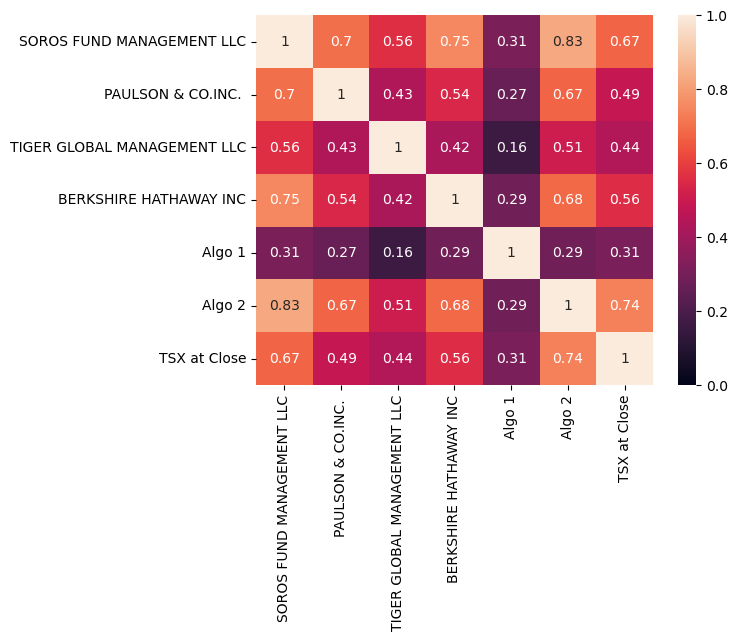

In [562]:
import seaborn as sns
sns.heatmap(correlation, vmin=0, vmax=1, annot=True)

In [607]:
## The portfolio that most closely mimics the TSX S&P 60 is Algo 2, followed by Soros and Berkshire. Of note, the 
## lowest correlation is with Algo 1 which is the portfolio that shows the largest cumulative return.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [397]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


In [563]:
covariance_algo1 = joined_returns['Algo 1'].cov(joined_returns['TSX at Close'])
covariance_algo1

1.6563000308911375e-05

In [564]:
variance_TSX = joined_returns['TSX at Close'].var()
variance_TSX

4.9479515915131015e-05

In [565]:
algo1_beta = covariance_algo1 / variance_TSX
algo1_beta

0.3347445908185684

In [566]:
rolling_covariance_algo1 = joined_returns['Algo 1'].rolling(window=30).cov(joined_returns['TSX at Close'])

In [567]:
rolling_variance_TSX = joined_returns['TSX at Close'].rolling(window=30).var()

<Axes: title={'center': 'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

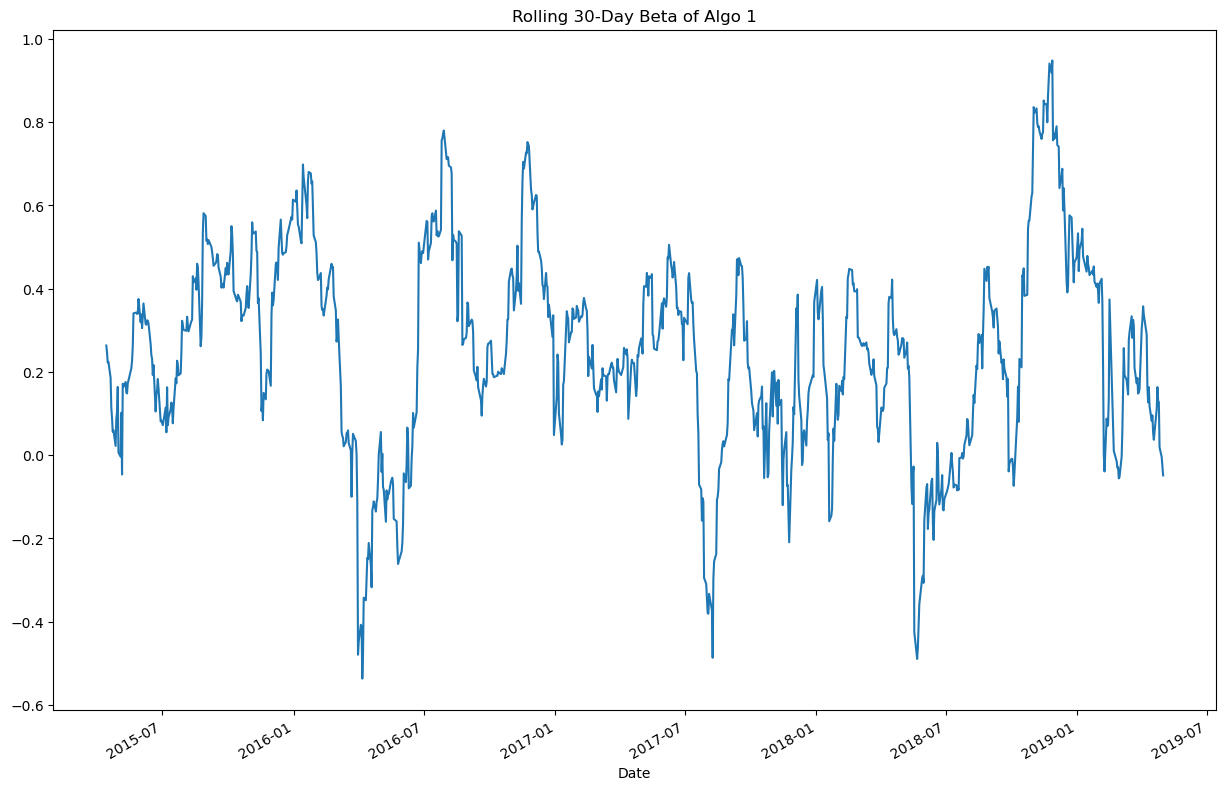

In [568]:
algo1_rolling_beta = rolling_covariance_algo1 / rolling_variance_TSX
algo1_rolling_beta.plot(figsize=(15, 10), title='Rolling 30-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [404]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [569]:
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\risk_free.csv")
risk_free = pd.read_csv(csvpath)
risk_free.head()

,Date,Price Change
0,10/1/2012,NaN
1,10/2/2012,-0.006154
2,10/3/2012,0.004954
3,10/4/2012,0.025878
4,10/5/2012,0.040240


In [570]:
risk_free.isnull().sum()

Date            0
Price Change    1
dtype: int64

In [571]:
risk_free = risk_free.dropna().copy()
risk_free.head()

,Date,Price Change
1,10/2/2012,-0.006154
2,10/3/2012,0.004954
3,10/4/2012,0.025878
4,10/5/2012,0.040240
5,10/8/2012,0.008083


In [572]:
risk_free.isnull().sum()

Date            0
Price Change    0
dtype: int64

In [573]:
risk_free = risk_free.set_index(pd.to_datetime(risk_free["Date"]))
risk_free.head()

,Date,Price Change
Date,,
2012-10-02,10/2/2012,-0.006154
2012-10-03,10/3/2012,0.004954
2012-10-04,10/4/2012,0.025878
2012-10-05,10/5/2012,0.040240
2012-10-08,10/8/2012,0.008083


In [574]:
risk_free = risk_free.drop(columns=["Date"])
risk_free.head()

,Price Change
Date,
2012-10-02,-0.006154
2012-10-03,0.004954
2012-10-04,0.025878
2012-10-05,0.040240
2012-10-08,0.008083


In [575]:
risk_free = risk_free.rename(columns = {"Price Change":"Rf"})
risk_free.head()

,Rf
Date,
2012-10-02,-0.006154
2012-10-03,0.004954
2012-10-04,0.025878
2012-10-05,0.040240
2012-10-08,0.008083


In [576]:
joined_returns_rf = pd.concat([joined_returns, risk_free], axis="columns", join="inner")
joined_returns_rf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,Rf
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.018234
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.000471
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.005181
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.060606
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.020089


In [577]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_returns_rf.mean()-joined_returns_rf['Rf'].mean()) * 252) / (joined_returns_rf.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.322283
PAULSON & CO.INC.             -1.230731
TIGER GLOBAL MANAGEMENT LLC   -0.582651
BERKSHIRE HATHAWAY INC         0.095512
Algo 1                         0.880084
Algo 2                        -0.201720
TSX at Close                  -0.454834
Rf                             0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

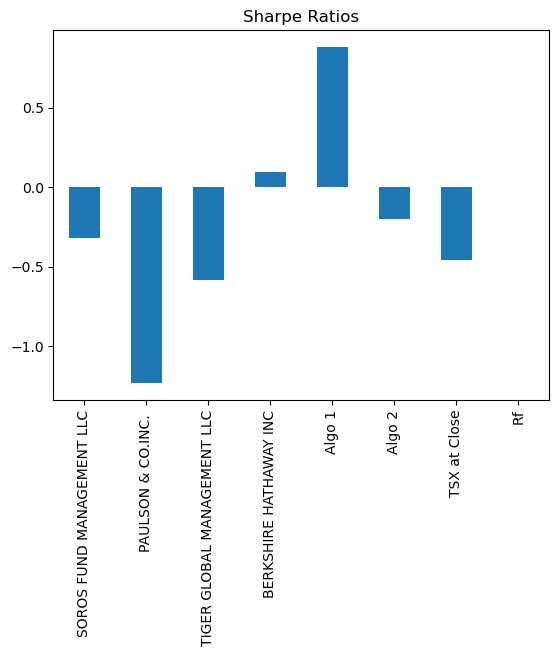

In [578]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [608]:
## Algo 1 outperformed the TSX and the whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [579]:
# Reading data from 1st stock
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\meta.csv")
meta = pd.read_csv(csvpath, index_col="Date", parse_dates=True)
meta.head()

,META
Date,
2018-01-02,181.42
2018-01-03,184.67
2018-01-04,184.33
2018-01-05,186.85
2018-01-08,188.28


In [580]:
# Reading data from 2nd stock
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\tsla.csv")
tsla = pd.read_csv(csvpath, index_col="Date", parse_dates=True)
tsla.head()

,TSLA
Date,
2018-01-02,21.37
2018-01-03,21.15
2018-01-04,20.97
2018-01-05,21.11
2018-01-08,22.43


In [581]:
# Reading data from 3rd stock
csvpath = Path(r"C:\Users\victo\OneDrive\Documentos\GitHub\Challenge-4\Starter_Code\Resources\visa.csv")
visa = pd.read_csv(csvpath, index_col="Date", parse_dates=True)
visa.head()

,VISA
Date,
2018-01-02,114.51
2018-01-03,115.65
2018-01-04,116.08
2018-01-05,118.86
2018-01-08,119.34


In [582]:
# Combine all stocks in a single DataFrame
vmp_portfolio = pd.concat([meta, tsla, visa], axis="columns", join="inner")
vmp_portfolio.head()

,META,TSLA,VISA
Date,,,
2018-01-02,181.42,21.37,114.51
2018-01-03,184.67,21.15,115.65
2018-01-04,184.33,20.97,116.08
2018-01-05,186.85,21.11,118.86
2018-01-08,188.28,22.43,119.34


In [609]:
# Reorganize portfolio data by having a column per symbol
## Done

In [583]:
# Calculate daily returns
# Drop NAs
# Display sample data

vmp_portfolio_returns = vmp_portfolio.pct_change().dropna()
vmp_portfolio_returns.head()

,META,TSLA,VISA
Date,,,
2018-01-03,0.017914,-0.010295,0.009955
2018-01-04,-0.001841,-0.008511,0.003718
2018-01-05,0.013671,0.006676,0.023949
2018-01-08,0.007653,0.062530,0.004038
2018-01-09,-0.002178,-0.008025,-0.001927


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [584]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
vmp_portfolio_returns_total = vmp_portfolio_returns.dot(weights)
# Display sample data
vmp_portfolio_returns_total.head()

Date
2018-01-03    0.005858
2018-01-04   -0.002211
2018-01-05    0.014765
2018-01-08    0.024740
2018-01-09   -0.004043
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [585]:
# Join your returns DataFrame to the original returns DataFrame
comparative_portfolios = pd.concat([joined_returns, vmp_portfolio_returns_total], axis="columns", join="inner")
comparative_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.005858
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.002211
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.014765
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.024740
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.004043


In [586]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comparative_portfolios.dropna()
comparative_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.005858
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.002211
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.014765
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.024740
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.004043


In [587]:
comparative_portfolios = comparative_portfolios.rename(columns={"0": "VMP"})
comparative_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.005858
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.002211
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.014765
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.024740
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.004043


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [588]:
# Calculate the annualized `std`
daily_std_vmp = vmp_portfolio_returns_total.std()
daily_std_vmp

0.01991231455755793

In [589]:
annualized_std_vmp = daily_std_vmp * np.sqrt(252)
annualized_std_vmp

0.31609819408193657

In [590]:
annualized_std

PAULSON & CO.INC.              0.110841
TSX at Close                   0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [591]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
rstd_21_vmp = vmp_portfolio_returns_total.rolling(window=21).std().dropna()
rstd_21_vmp.head()

Date
2018-02-01    0.009604
2018-02-02    0.011215
2018-02-05    0.014407
2018-02-06    0.014627
2018-02-07    0.013583
dtype: float64

<Axes: xlabel='Date'>

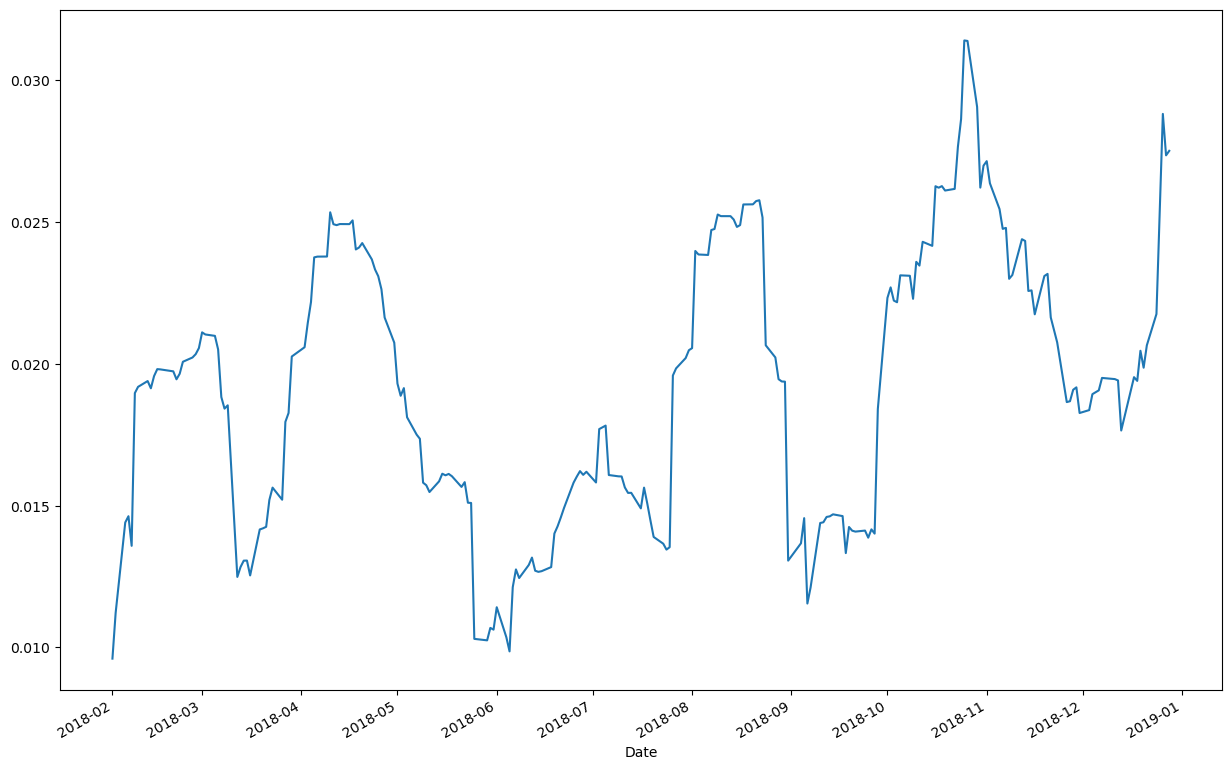

In [592]:
rstd_21_vmp.plot(figsize=(15,10))

### Calculate and plot the correlation

In [593]:
# Calculate and plot the correlation
correlation_vmp = comparative_portfolios.corr()
correlation_vmp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,0
SOROS FUND MANAGEMENT LLC,1.000000,0.768235,0.615918,0.787919,0.348972,0.838786,0.682972,0.594227
PAULSON & CO.INC.,0.768235,1.000000,0.667124,0.656696,0.328771,0.808609,0.661950,0.518963
TIGER GLOBAL MANAGEMENT LLC,0.615918,0.667124,1.000000,0.495768,0.166664,0.617601,0.529503,0.426294
BERKSHIRE HATHAWAY INC,0.787919,0.656696,0.495768,1.000000,0.345638,0.788172,0.641664,0.709419
Algo 1,0.348972,0.328771,0.166664,0.345638,1.000000,0.335266,0.327392,0.203434
Algo 2,0.838786,0.808609,0.617601,0.788172,0.335266,1.000000,0.763062,0.613627
TSX at Close,0.682972,0.661950,0.529503,0.641664,0.327392,0.763062,1.000000,0.477230
0,0.594227,0.518963,0.426294,0.709419,0.203434,0.613627,0.477230,1.000000


<Axes: >

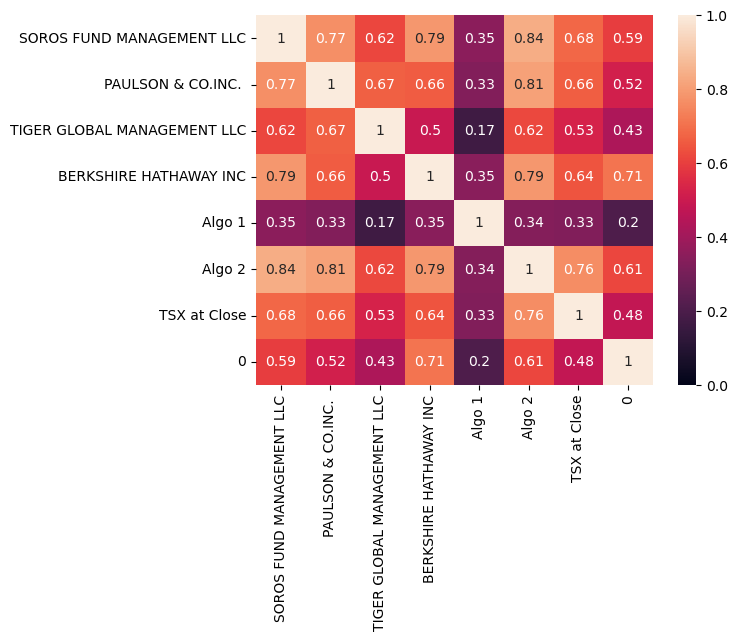

In [594]:
sns.heatmap(correlation_vmp, vmin=0, vmax=1, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


In [595]:
covariance_vmp = vmp_portfolio_returns_total.cov(comparative_portfolios['TSX at Close'])
covariance_vmp

6.11320309627188e-05

In [596]:
vmp_beta = covariance_vmp / variance_TSX
vmp_beta

1.235501799726064

In [597]:
rolling_covariance_vmp = vmp_portfolio_returns_total.rolling(window=60).cov(comparative_portfolios['TSX at Close'])

<Axes: title={'center': 'Rolling 60-Day Beta of VMP'}, xlabel='Date'>

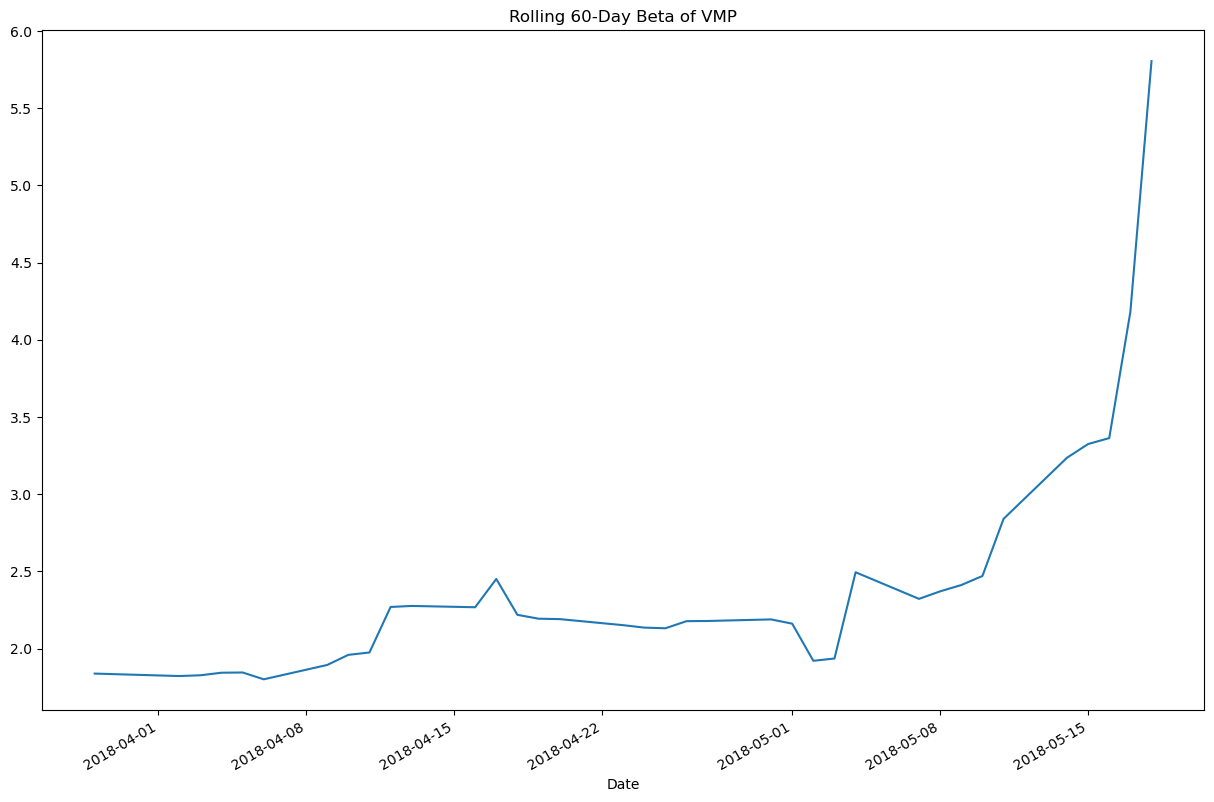

In [598]:
vmp_rolling_beta = rolling_covariance_vmp / rolling_variance_TSX
vmp_rolling_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of VMP')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [599]:
comparative_portfolios_vmp_rf = pd.concat([comparative_portfolios, risk_free], axis="columns", join="inner")
comparative_portfolios_vmp_rf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,0,Rf
Date,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.005858,-0.007302
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.002211,0.002452
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.014765,0.009376
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.024740,0.001615
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.004043,0.026613


In [600]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_vmp = ((comparative_portfolios_vmp_rf.mean()-comparative_portfolios_vmp_rf['Rf'].mean()) * 252) / (comparative_portfolios_vmp_rf.std() * np.sqrt(252))
sharpe_ratios_vmp

SOROS FUND MANAGEMENT LLC     -2.124941
PAULSON & CO.INC.             -2.410354
TIGER GLOBAL MANAGEMENT LLC   -2.477862
BERKSHIRE HATHAWAY INC        -1.425028
Algo 1                         0.306775
Algo 2                        -2.196505
TSX at Close                  -2.388318
0                             -0.437964
Rf                             0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios VMP'}>

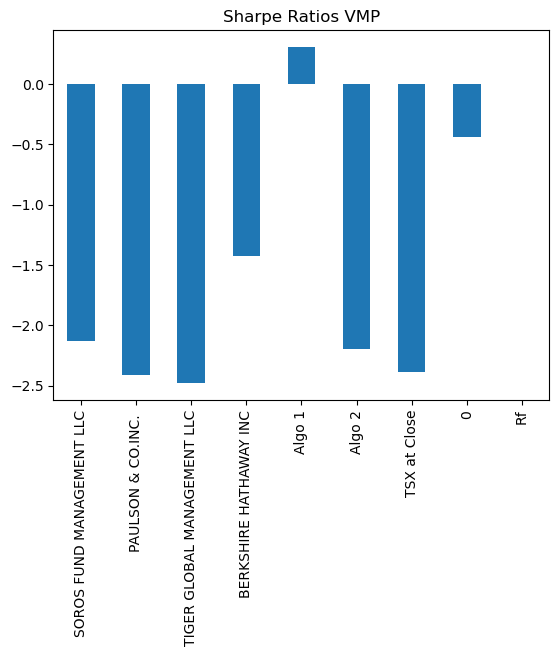

In [601]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_vmp.plot(kind="bar", title="Sharpe Ratios VMP")

### How does your portfolio do?

Write your answer here!

In [610]:
## For the reported period, my portfolio performed better than most other portfolios except for the risk free 
## and the Algo 1 portfolios. Of note, my portfolio lost less money than the other portfolios, while Risk Free 
## and Algo 1 manage to make money. On a risk adjusted basis, Algo 1 took higher risk than the other portfolios 
## but provided a significantly higher return.

In [602]:
cumulative_returns = (1 + comparative_portfolios_vmp_rf).cumprod()

<Axes: xlabel='Date'>

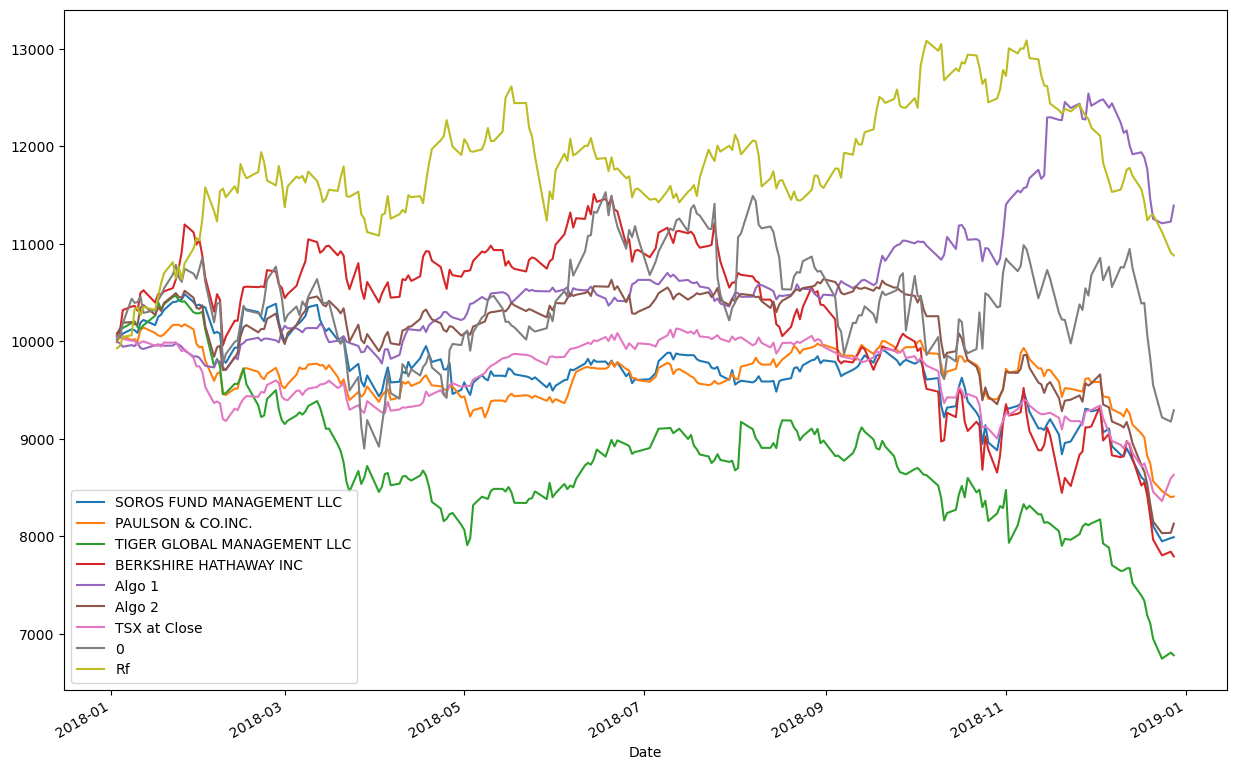

In [603]:
initial_investment = 10000

# Compute cumulative returns
cumulative_profit = initial_investment * cumulative_returns

# Plot the returns of the investment
cumulative_profit.plot(figsize=(15, 10))

In [604]:
cumulative_profit.iloc[[0,-1]]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX at Close,0,Rf
Date,,,,,,,,,
2018-01-03,10046.575491,10000.270673,10019.788283,10056.762804,9991.097942,10081.750714,10037.743739,10058.582963,9926.978000
2018-12-28,7990.720668,8408.226233,6779.696534,7793.492743,11391.866584,8129.434703,8629.761041,9291.889092,10879.688544
